# Algorithme des arbres de décision pour  un problème de classification

Nous allons travailler avec le jeu de données breast_cancer,pour plus d'informations cliquer sur ce lien https://goo.gl/U2Uwz2

## Chargement des bibiliothèque nécessaires

## Vérifier la version de sklearn

In [1]:
import sklearn
print('La version de sklearn :', sklearn.__version__)

La version de sklearn : 0.24.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Data Loading Code Hidden Here
import pandas as pd

In [4]:
import pyodbc
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-2RDIL6K;'
                      'Database=transport2;'
                      'Trusted_Connection=yes;')
#df = pd.read_sql_query('SELECT * From Reseau_ferre',conn)

df = pd.read_sql_query("SELECT * From ferresSA where NB_VALD != 'Moins de 5' ",conn)

- Créer une variable `df` à qui vous affectez le jeux de données breast_cancer

In [5]:
df.keys()

Index(['JOUR', 'CODE_STIF_TRNS', 'CODE_STIF_RES', 'CODE_STIF_ARRET',
       'LIBELLE_ARRET', 'CATEGORIE_TITRE', 'NB_VALD'],
      dtype='object')

- Afficher df

In [6]:
df

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,CATEGORIE_TITRE,NB_VALD
0,18/01/2016,100,110,763,SAINT-DENIS-UNIVERSITE,4,343
1,18/03/2016,800,851,158,CHARTRETTES,0,16
2,14/01/2016,100,110,27,ARTS ET METIERS,3,387
3,01/01/2016,800,805,298,GAGNY,0,232
4,18/01/2016,100,110,99,BOULOGNE-JEAN JAURES,1,1789
...,...,...,...,...,...,...,...
60855,05/01/2016,100,110,494,MAIRIE DES LILAS,2,1025
60856,05/01/2016,100,110,495,MAIRIE D'ISSY,3,201
60857,05/01/2016,100,110,495,MAIRIE D'ISSY,1,1746
60858,05/01/2016,100,110,496,MAIRIE D'IVRY,3,377


In [7]:
#df['NB_VALID'] = df['NB_VALID'].astype(int)
df['NB_VALD'] = pd.to_numeric(df['NB_VALD'])

In [8]:
df['CODE_STIF_TRNS'] = pd.to_numeric(df['CODE_STIF_TRNS'])

In [9]:
df['CODE_STIF_ARRET']= df['CODE_STIF_ARRET'].replace('ND', '0')

In [10]:
df['CODE_STIF_ARRET'] = pd.to_numeric(df['CODE_STIF_ARRET'])

In [11]:
df.dtypes

JOUR               object
CODE_STIF_TRNS      int64
CODE_STIF_RES      object
CODE_STIF_ARRET     int64
LIBELLE_ARRET      object
CATEGORIE_TITRE    object
NB_VALD             int64
dtype: object

In [12]:
df['CODE_STIF_RES']= df['CODE_STIF_RES'].replace('ND', '0')

In [13]:
df['CODE_STIF_RES'] = pd.to_numeric(df['CODE_STIF_RES'])

In [14]:
df['CATEGORIE_TITRE'] = pd.to_numeric(df['CATEGORIE_TITRE'])

In [15]:
#print(df.DESCR)
fea=['CODE_STIF_TRNS', 'CODE_STIF_RES', 'CODE_STIF_ARRET','NB_VALD']

#### Extraire de `df` : les observations dans un tableau 2D `X` et les classes dans un tableau 1D `y`

In [16]:
#df.target_names

In [16]:
X = df[['CODE_STIF_TRNS','CODE_STIF_RES', 'CODE_STIF_ARRET','NB_VALD']]
y = df['CATEGORIE_TITRE']

In [17]:
X.shape

(60860, 4)

In [18]:
y.shape

(60860,)

#### Diviser l'ensemble des observations X et l'ensemble de classes y, chacun en deux sous-ensembles :
- un sous-ensemble d'apprentissage : 70% de l'ensemble initial
- un sous-ensemble de test : 30% de l'ensemble initial


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=3)# random_state=some_number pour garantir que votre split sera toujours le même

#### Importer le modèle __`DecisionTreeClassifier`__ à partir du module __`tree`__ du module __`sklearn`__.


In [20]:
from sklearn.tree import DecisionTreeClassifier

#### Afficher la description de la classe __`DecisionTreeClassifier`__

In [21]:
#DecisionTreeClassifier()
#DecisionTreeClassifier?

 
#### Créer une instance   __`dt`__  de la classe  __`DecisionTreeClassifier`__ en fixant à __zéro__  __`random_state`__. Garder l'indice de Gini comme __`criterion`__ par defaut. 

In [21]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=30,random_state=0)

#### Entrainer le modèle __`dt`__ sur les sous-ensembles d'apprentissage (observations et classes) 

In [22]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=0)

In [23]:
type('X_train')

str

In [40]:
from sklearn.model_selection import GridSearchCV
tree_para = {'criterion':['gini'],'max_depth':[4,5,6,7,8,9,10]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
best_model = clf.fit(X_train, y_train)
print('Best p:', best_model.best_estimator_.get_params())

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best p: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


#### Calculer les scores d'apprentissage et de test relatifs au modèle dt

In [41]:
print('Le train score est :', dt.score(X_train, y_train))
print('Le test score est :', dt.score(X_test, y_test))

Le train score est : 0.9509119290174171
Le test score est : 0.609842260926717


In [42]:
y_test.shape

(12172,)

Comme on peut le voir sur l'ensemble d'entraînement, le taux de bonne classif est 100% -->  un indicateur de sur-apprentissage.

In [43]:
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[1819  330   71   31    9   11    0]
 [ 322 1349  281  127   54   41    0]
 [  79  253 1182  245  149   92    0]
 [  33  156  353  978  356  183    0]
 [  10   59  196  348 1052  245    0]
 [   6   40  116  225  328 1042    0]
 [   0    0    0    0    0    0    1]]


#### Tracer la matrice de confusion de __`dt`__

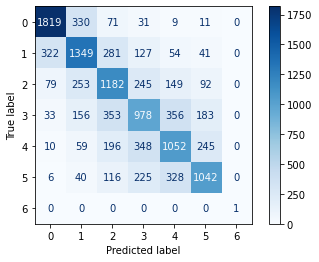

In [44]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### Afficher le __`classification_report`__ de __`dt`__

In [31]:
from sklearn.metrics import classification_report
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred, digits=8 ))



              precision    recall  f1-score   support

           0  0.80167475 0.80096874 0.80132159      2271
           1  0.61682670 0.62051518 0.61866544      2174
           2  0.53751705 0.59100000 0.56299119      2000
           3  0.50051177 0.47498786 0.48741590      2059
           4  0.54004107 0.55078534 0.54536029      1910
           5  0.64560099 0.59305635 0.61821418      1757
           6  1.00000000 1.00000000 1.00000000         1

    accuracy                      0.60984226     12172
   macro avg  0.66316748 0.66161621 0.66199551     12172
weighted avg  0.61074366 0.60984226 0.60985805     12172



### Afficher l'importance de chaque variable

In [45]:
X.shape

(60860, 4)

In [47]:
df.CATEGORIE_TITRE

AttributeError: 'DataFrame' object has no attribute 'CATEGORIE_TITRE'

In [48]:
fea=['CODE_STIF_TRNS', 'CODE_STIF_RES', 'CODE_STIF_ARRET','NB_VALD']

In [35]:
names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
         'mean smoothness', 'mean compactness', 'mean concavity',
         'mean concave points', 'mean symmetry', 'mean fractal dimension',
         'radius error', 'texture error', 'perimeter error', 'area error',
         'smoothness error', 'compactness error', 'concavity error',
         'concave points error', 'symmetry error',
         'fractal dimension error', 'worst radius', 'worst texture',
         'worst perimeter', 'worst area', 'worst smoothness',
         'worst compactness', 'worst concavity', 'worst concave points',
         'worst symmetry', 'worst fractal dimension']

In [32]:
for var, importance in zip(names, dt.feature_importances_):
    if importance != 0:
        print(var, importance)

NameError: name 'names' is not defined

In [49]:
df["CATEGORIE_TITRE"]=df["CATEGORIE_TITRE"].apply(str)

KeyError: 'CATEGORIE_TITRE'

In [34]:
df.dtypes

JOUR               object
CODE_STIF_TRNS      int64
CODE_STIF_RES       int64
CODE_STIF_ARRET     int64
LIBELLE_ARRET      object
CATEGORIE_TITRE    object
NB_VALD             int64
dtype: object


#### Exécuter le code ci-dessous pour afficher l'arbre de décision

In [35]:
df.columns

Index(['JOUR', 'CODE_STIF_TRNS', 'CODE_STIF_RES', 'CODE_STIF_ARRET',
       'LIBELLE_ARRET', 'CATEGORIE_TITRE', 'NB_VALD'],
      dtype='object')

In [36]:
!pip install graphviz

In [37]:
df.columns
my_cat=df["CATEGORIE_TITRE"].unique()
df=df.drop(columns=["CATEGORIE_TITRE"])
my_cat
df.columns

Index(['JOUR', 'CODE_STIF_TRNS', 'CODE_STIF_RES', 'CODE_STIF_ARRET',
       'LIBELLE_ARRET', 'NB_VALD'],
      dtype='object')

In [38]:
from sklearn.tree import plot_tree
from sklearn import tree
import graphviz 

df=df.drop(columns=["JOUR","LIBELLE_ARRET"])
dot_data = tree.export_graphviz(dt, out_file=None, 
                    feature_names=df.columns,  
                      class_names=my_cat,  
                      filled=True, rounded=True,  
                    special_characters=True)  
graph = graphviz.Source(dot_data)


"""
plt.figure(figsize=(30,10))
df= df.drop(columns=['JOUR','LIBELLE_ARRET'])
plot_tree(dt, feature_names= list(df.columns), class_names=list(df.CATEGORIE_TITRE.unique()), filled=True)
plt.show()
"""

In [39]:
graph.render('dtree_render_',view=True)

'dtree_render_.pdf'

#### Exécuter le code ci-dessous pour afficher l'arbre sous forme de régles de décision

In [ ]:


from sklearn.tree import export_text
print(export_text(dt, feature_names=names))
|--- worst area <= 874.85
|   |--- worst concave points <= 0.16
|   |   |--- mean concave points <= 0.05
|   |   |   |--- area error <= 48.70
|   |   |   |   |--- worst texture <= 33.27
|   |   |   |   |   |--- class: 1from sklearn.tree import export_text
print(export_text(dt, feature_names=names))

In [ ]:
X.shape

#### Que pensez-vous de la complexité de l'arbre ?


#### L'arbre est trop long et difficile à interpreter. Pour faire face à ce problème on va essayer de régler les hyperparamètre de notre modèle.

#### Créer un dictionaire __`param_grid`__, en vue de configurer les deux hyperparamètres suivants :
##### - __`criterion`__ : qui peut être soit l'indice de Gini soit l'entropie
##### - __`max_depth`__ : qui varie de 1 à 9

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,10)}

#### Charger la méthode GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV


#### Créer une instance de recherche par grille appliquée sur l'algorithme de classification par arbre de décision. La recherche doit tester toutes les combinaisons des valeurs des hyperparamètres 

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5)

#### Entrainer l'instance de modèle créé sur les sous-ensembles de données approprié.

In [ ]:
grid.fit(X_train, y_train)


#### Afficher les meilleures valeurs des hyperparamètres réglés

In [ ]:
grid.best_params_

#### Créer une instance __`final_model`__ de l'algorithme de classification par arbres de décision en utilisant les meilleurs hyperparamètres 

In [ ]:
final_model = DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=2)

#### Entrainer __`final_model`__ sur le sous-ensemble de données approprié.

In [ ]:
final_model.fit(X_train, y_train)

#### Evaluer la performance de final_model sur le sous-ensemble de données approprié

In [ ]:
print( 'le train_score=',final_model.score(X_train, y_train))
print( 'le test_score=',final_model.score(X_test, y_test))

#### tracer la matrice de confusion de __`final_model`__

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_test, y_test, display_labels=df.target_names, cmap=plt.cm.Blues)
plt.show()

### Afficher le __`classification_report`__ de __`final_model`__

In [ ]:
from sklearn.metrics import classification_report
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=8, target_names= df.target_names ))


#### Comparer la performance de ce modèle dont les hyperparamètres ont été réglés avec celui de dt sans réglage d'hyperparamètres

#### Afficher l'arbre de décision de __`final_model`__ et le compararer à celui de la première partie.

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(final_model, feature_names= names, class_names=df.target_names, filled=True)
plt.show()

In [ ]:
final_model.feature_importances_

#### Afficher l'arbre de décision de __`final_model`__ sous forme de règles de décision

In [ ]:
from sklearn.tree import export_text
print(export_text(final_model, feature_names=names))